In [9]:
import util
import vqe_class
import ansatz_circ

import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
from matplotlib import animation

from qiskit.primitives import Estimator,Sampler
from qiskit_aer import AerSimulator
from qiskit.algorithms.optimizers import COBYLA,NFT,GradientDescent,ADAM

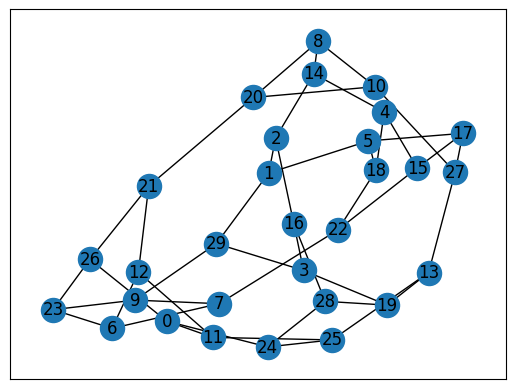

In [10]:
n_vertex=30
graph=nx.random_regular_graph(3,n_vertex)
p=0.6
#graph=nx.gnp_random_graph(n_vertex,p)
#graph=nx.barabasi_albert_graph(n_vertex,3)
sum=0
# Assign random weights to edges
for edge in graph.edges():
    a=np.random.rand(1)[0]
    sum+=a
    #graph.edges[edge]['weight'] = np.random.rand()
    graph.edges[edge]['weight'] = 1
nx.draw_networkx(graph)

In [11]:
max=util.branch_and_bound(graph)[0]

In [12]:
gw_cut=util.gw_cut(graph)

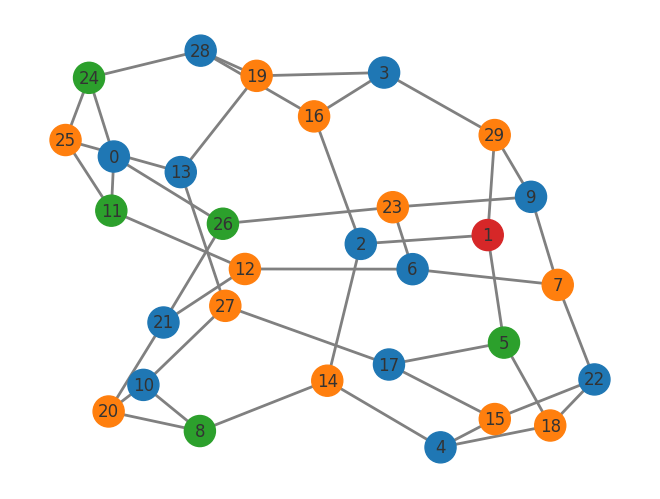

In [13]:
graph_coloring = nx.greedy_color(graph)

unique_colors = set(graph_coloring.values())

# Assign colors to nodes based on the greedy coloring
graph_color_to_mpl_color = dict(zip(unique_colors, mpl.TABLEAU_COLORS))
node_colors = [graph_color_to_mpl_color[graph_coloring[n]] for n in graph.nodes()]

pos = nx.spring_layout(graph, seed=14)
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=500,
    node_color=node_colors,
    edge_color="grey",
    font_size=12,
    font_color="#333333",
    width=2,
)

In [14]:
nft=NFT(maxiter=1000, maxfev=1024, disp=False, reset_interval=1000, options=None)
cobyla=COBYLA(maxiter=30000, disp=True, rhobeg=0.1, tol=0.01, options=None)
adam=ADAM(maxiter=300, tol=1e-02, lr=0.1, beta_1=0.98, beta_2=0.99, noise_factor=1e-08, eps=1e-2, amsgrad=True, snapshot_dir=None)
g_d=GradientDescent(maxiter=300,learning_rate=0.01, tol=0.01, callback=None, perturbation=None)



estimator_dens= AerSimulator(method='density_matrix')
estimator_state= AerSimulator(method='statevector')
estimator = Estimator()
sampler = Sampler()


In [15]:
n_vertex=len(graph.nodes())
num_qubits=len(util.operator_vertex_qrao(graph)[0][0])
alpha=np.sqrt(len(graph.nodes()))

ans_ent=ansatz_circ.ansatz_efficient(num_qubits,10)
ans=ansatz_circ.sep_ansatz(graph,10)
circuits=ansatz_circ.multibasis_ansatz(ans)
circuits_ent=ansatz_circ.multibasis_ansatz(ans_ent)

7


In [16]:
intermediate_qrao_sep=[]
intermediate_qrao_ent=[]
optimizer=cobyla
gw_cut=util.gw_cut(graph)
def callback(data):
    intermediate_qrao_sep.append(data)
qrao=vqe_class.QRAO_encoding_VQE(estimator,sampler, circuits, optimizer,graph,min,shots=None,initial_parameters=None,callback=callback)
result_sep= qrao.compute_minimum_eigenvalue(min)
def callback(data):
    intermediate_qrao_ent.append(data)
qrao=vqe_class.QRAO_encoding_VQE(estimator,sampler, circuits_ent, optimizer,graph,min,shots=None,initial_parameters=None,callback=callback)
result_ent= qrao.compute_minimum_eigenvalue(min)


print(result_sep.eigenvalue)
print(result_ent.eigenvalue)


[ 0.90674337  0.87800244  1.02774162  1.18557179  0.01314838  0.32283622
  1.12582853 -0.06912795  1.02601955  1.22064542  0.62716042  1.84334911
  0.62763659  0.83402049  0.83595567  1.08126022  1.18551553  0.35767756
  0.15090011  1.60389702  0.27402911  1.26718867  0.60899312  1.40837765
  0.18200326  0.47520234  0.22629652  0.38807201  1.26841971  0.70326925
  0.15809597  0.79573591  1.14079565  0.90246235  1.03350554 -0.11805549
  0.94287539  0.56918424  1.39286318  0.8218865   1.29116226  0.61479465
  0.48783603  1.43730429  0.89522825  0.07919118  1.6058461   0.56754767
  0.92050824  0.7811134   1.57200793  1.59014865  1.61154941  0.08615773
  1.12558372  0.02313743  0.92633262  1.11073817  0.99166397  0.85344541
  0.16144155  0.65009672  1.06763989  0.4222723   0.65837602  1.43445349
  1.00721711  1.57956088  0.59593007  0.68103964  0.7603549   0.93701112
  0.19871152  1.23379896  1.67824374  0.56057903  1.1127894   0.91384146
  1.19724175  0.24674254  1.1771311   1.88602267  0

In [ ]:
gw_cut

31

In [ ]:
n_vertex=len(graph.nodes())
num_qubits=len(util.operator_vertex(graph)[0][0])
alpha=np.sqrt(len(graph.nodes()))

ans_ent=ansatz_circ.ansatz_efficient(num_qubits,int(num_qubits/2)+1)
ans=ansatz_circ.sep_ansatz(graph,4)
circuits=ansatz_circ.multibasis_ansatz(ans)
circuits_ent=ansatz_circ.multibasis_ansatz(ans_ent)
beta=1

6


In [ ]:
v=0
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
result_qrao_sep= qrao.compute_minimum_eigenvalue(min)



v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.05, tol=0.01, options=None)
intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
result_qrao_non_sep= qrao.compute_minimum_eigenvalue(min)



v=0
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits_ent,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
result_qrao_ent= qrao.compute_minimum_eigenvalue(min)



v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.05, tol=0.01, options=None)
intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits_ent,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
result_qrao_non_ent= qrao.compute_minimum_eigenvalue(min)




approxs
0.6221430187064135
-0.6471513460536914
0.6451612903225806
approxs
0.6235454388513305
-0.6476125390963423
0.6451612903225806
approxs
0.6235897874265908
-0.6477750898173441
0.6451612903225806
approxs
0.6219556565128979
-0.6472232569881632
0.6451612903225806
approxs
0.6236396673654775
-0.6478342186334763
0.6451612903225806
approxs
0.6234703552635409
-0.647680714549291
0.6451612903225806
approxs
0.6240046019422137
-0.6476435168417314
0.6451612903225806
approxs
0.6221621793552594
-0.6468814768959951
0.6451612903225806
approxs
0.6222917292600159
-0.6472397466956537
0.6451612903225806
approxs
0.6225616536638188
-0.6471621213596449
0.6451612903225806
approxs
0.6237454299134801
-0.6471052438455808
0.6451612903225806
approxs
0.622162373549276
-0.6468816488553923
0.6451612903225806
approxs
0.6248042654539683
-0.6479273479571607
0.6451612903225806
approxs
0.6245159355009667
-0.6477777347364962
0.6451612903225806
approxs
0.6232980490702476
-0.6473401336648024
0.6451612903225806
approxs
0.62

KeyboardInterrupt: 

In [ ]:
print(result_qrao_sep.eigenvalue)
print(result_qrao_non_sep.eigenvalue)
print(result_qrao_ent.eigenvalue)
print(result_qrao_non_ent.eigenvalue)


28.0
32.0
29.0
34.0


In [ ]:
v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=1000, disp=True, rhobeg=1, tol=0.01, options=None)



intermediate_info_init= []
def callback(data):
    intermediate_info_init.append(data)
qrao=vqe_class.QRAO_initial_state_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
result_init=qrao.compute_minimum_eigenvalue(min)
new_init_sep=result_init.optimal_parameters
qrao=vqe_class.QRAO_initial_state_VQE(graph,sampler,circuits_ent,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
result_init_ent=qrao.compute_minimum_eigenvalue(min)
new_init_ent=result_init_ent.optimal_parameters


v=0
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_sep,callback=callback)
result_qrao= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao.optimal_parameters
v=gw_cut/2
gamma=1
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
#intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
result_qrao_sep_warm= qrao.compute_minimum_eigenvalue(min)




v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_sep,callback=callback)
result_qrao_non= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao_non.optimal_parameters
v=gw_cut/2
gamma=1

cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
#intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
result_qrao_non_sep_warm= qrao.compute_minimum_eigenvalue(min)





v=0
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits_ent,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_ent,callback=callback)
result_qrao= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao.optimal_parameters
v=gw_cut/2
gamma=1
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
#intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits_ent,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
result_qrao_ent_warm= qrao.compute_minimum_eigenvalue(min)



v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits_ent,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_ent,callback=callback)
result_qrao_non= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao_non.optimal_parameters
v=gw_cut/2
gamma=1

cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
#intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits_ent,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
result_qrao_non_ent_warm= qrao.compute_minimum_eigenvalue(min)







approxs
0.6086420347740934
-0.6057162766662189
0.6875
approxs
0.6092273394674327
-0.6084163441420071
0.65625
approxs
0.6080796287173742
-0.603286086237196
0.53125
approxs
0.6091870616423405
-0.6081928541712969
0.65625
approxs
0.6092235971390487
-0.6081120600055316
0.65625
approxs
0.6086822711962366
-0.6056965737724834
0.65625
approxs
0.6102819024739825
-0.6145432858656612
0.78125
approxs
0.6098220571294926
-0.6134039417551728
0.78125
approxs
0.6100223609042055
-0.6130521488323366
0.78125
approxs
0.6093899326056752
-0.6096418471592274
0.6875
approxs
0.6111375566392104
-0.6179827375980832
0.75
approxs
0.6113092659760537
-0.6213481793259787
0.78125
approxs
0.6119794606703043
-0.6259138928690827
0.78125
approxs
0.6118508766661895
-0.6243515254129312
0.78125
approxs
0.6127234989156065
-0.6281759246578044
0.78125
approxs
0.6127234989156066
-0.6281759246578044
0.78125
approxs
0.6131839606034516
-0.6292463755268294
0.78125
approxs
0.6133505042795581
-0.6292611224760544
0.6875
approxs
0.6094527

In [ ]:

print(result_qrao_non_sep_warm.eigenvalue)
print(result_qrao_sep_warm.eigenvalue)
print(result_qrao_ent_warm.eigenvalue)
print(result_qrao_non_ent_warm.eigenvalue)

28.0
28.0
33.0
34.0


In [ ]:
num_qubits=math.ceil(math.log((n_vertex/3+1),2))+1
depth=num_qubits+2
v=gw_cut
beta=0.5
alpha=np.sqrt(num_qubits)

obs=util.vertex_to_pauli_full_encoding(n_vertex,num_qubits,num_qubits,0)

ansatz=ansatz_circ.ansatz_efficient(num_qubits,depth)


intermediate_info= []
def callback(data):
                intermediate_info.append(data)


optimizer=cobyla
custom_vqe = vqe_class.VQE_full_encoding(graph,estimator,ansatz,optimizer,obs,num_qubits,max,alpha,beta,v,initial_parameters=None,callback=callback)
result= custom_vqe.compute_minimum_eigenvalue(min)
print(min)
print(result.eigenstate)
print(result.eigenvalue)

189
{'ZIIIII': 1, 'IZIIII': 1, 'IIZIII': 1, 'IIIZII': 1, 'IIIIZI': 1, 'IIIIIZ': 1, 'XIIIII': 1, 'IXIIII': 1, 'IIXIII': 1, 'IIIXII': 1, 'IIIIXI': 1, 'IIIIIX': 1, 'YIIIII': 1, 'IYIIII': 1, 'IIYIII': 1, 'IIIYII': 1, 'IIIIYI': 1, 'IIIIIY': 1, 'ZZIIII': 1, 'ZIZIII': 1, 'ZIIZII': 1, 'ZIIIZI': 1, 'ZIIIIZ': 1, 'IZZIII': 1, 'IZIZII': 1, 'IZIIZI': 1, 'IZIIIZ': 1, 'IIZZII': 1, 'IIZIZI': 1, 'IIZIIZ': 1, 'IIIZZI': 1, 'IIIZIZ': 1, 'IIIIZZ': 1, 'XXIIII': 1, 'XIXIII': 1, 'XIIXII': 1, 'XIIIXI': 1, 'XIIIIX': 1, 'IXXIII': 1, 'IXIXII': 1, 'IXIIXI': 1, 'IXIIIX': 1, 'IIXXII': 1, 'IIXIXI': 1, 'IIXIIX': 1, 'IIIXXI': 1, 'IIIXIX': 1, 'IIIIXX': 1, 'YYIIII': 1, 'YIYIII': 1, 'YIIYII': 1, 'YIIIYI': 1, 'YIIIIY': 1, 'IYYIII': 1, 'IYIYII': 1, 'IYIIYI': 1, 'IYIIIY': 1, 'IIYYII': 1, 'IIYIYI': 1, 'IIYIIY': 1, 'IIIYYI': 1, 'IIIYIY': 1, 'IIIIYY': 1, 'ZZZIII': 1, 'ZZIZII': 1, 'ZZIIZI': 1, 'ZZIIIZ': 1, 'ZIZZII': 1, 'ZIZIZI': 1, 'ZIZIIZ': 1}


KeyboardInterrupt: 

In [ ]:
num_qubits=math.ceil(math.log((n_vertex/3+1),2))+1

depth=num_qubits+2
v=0
beta=0.5
alpha=num_qubits

obs=util.vertex_to_pauli_full_encoding(n_vertex,num_qubits,num_qubits,0)

ansatz=ansatz_circ.ansatz_efficient(num_qubits,depth)


intermediate_info= []
def callback(data):
                intermediate_info.append(data)


optimizer=cobyla
custom_vqe = vqe_class.VQE_full_encoding_quad(graph,estimator,ansatz,optimizer,obs,num_qubits,max,alpha,beta,v,initial_parameters=None,callback=callback)
result= custom_vqe.compute_minimum_eigenvalue(min)
print(min)
print(result.eigenstate)
print(result.eigenvalue)

93
{'ZIIII': 1, 'IZIII': 1, 'IIZII': 1, 'IIIZI': 1, 'IIIIZ': 1, 'XIIII': 1, 'IXIII': 1, 'IIXII': 1, 'IIIXI': 1, 'IIIIX': 1, 'YIIII': 1, 'IYIII': 1, 'IIYII': 1, 'IIIYI': 1, 'IIIIY': 1, 'ZZIII': 1, 'ZIZII': 1, 'ZIIZI': 1, 'ZIIIZ': 1, 'IZZII': 1, 'IZIZI': 1, 'IZIIZ': 1, 'IIZZI': 1, 'IIZIZ': 1, 'IIIZZ': 1, 'XXIII': 1}
-31.0
<built-in function min>
['0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0']
31.0
